# Umang Singhal
## Prediction using Supervised ML
## Prediction of percentage of marks of a student based on the number of study hours

In [ ]:
# Importing All Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score     

%matplotlib inline

In [ ]:
# Reading Data 
s_d = pd.read_csv('http://bit.ly/w-data')
print('Data imported successfully')

Data imported successfully


In [ ]:
s_d.shape

(25, 2)

In [ ]:
# Lets have a look on the data
s_d.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Analysis of Data

In [ ]:
# Check for null values 
s_d.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#Taking a bit Insight of data
s_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
s_d.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization of Data

Text(0, 0.5, 'Percentage Score')

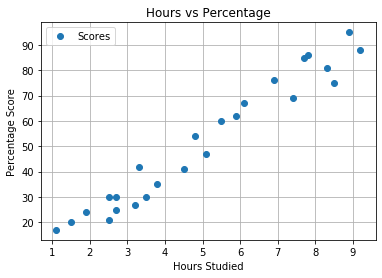

In [ ]:
s_d.plot(x='Hours',y='Scores',style='o',grid=True)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

**The graph shows a positive relationship between the number of hours studied and percentage of score.**

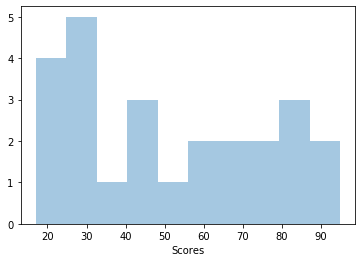

In [ ]:
sns.distplot(s_d['Scores'],bins=10,kde=False)

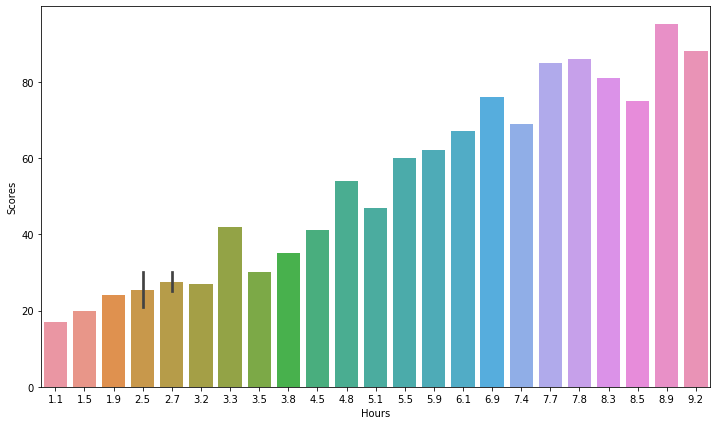

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Hours',y='Scores',data=s_d)

### Prepare data


In [ ]:
X = s_d.iloc[:,:-1].values
y = s_d.iloc[:,1].values

In [ ]:
# Spliting train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y
                            ,test_size=0.3,random_state=0)

### Model Building

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

print('Training Complete')

Training Complete


In [ ]:
coeff = reg.coef_
intercept = reg.intercept_

line = coeff*X + intercept

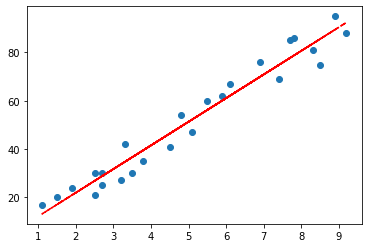

In [ ]:
plt.plot(X,y,'o')
plt.plot(X,line,'r--')

### Prediction

In [ ]:
# Predicting Test Data
pred = reg.predict(X_test)

In [ ]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [ ]:
# Lets test with own Data
hours = [[9.25]]
y_pred_own = reg.predict(hours)
y_pred_own[0]

92.91505723477056

### Model Evaluation

In [ ]:
print('Mean Absolute Error:'
      ,mean_absolute_error(y_test, pred))

Mean Absolute Error: 4.419727808027652


In [ ]:
print('Mean Squared Error:'
      ,mean_squared_error(y_test, pred))

Mean Squared Error: 22.96509721270043


In [ ]:
print('R2 Score:', r2_score(y_test, pred))

R2 Score: 0.9568211104435257


**High R2 score and evaluation results shows that Model is performing good .** 